In [4]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from affine import Affine
tif_path = "./drive/MyDrive/Colab Notebooks/Thesis_Deliverable/Resources/AFF - AFF Midkin - Midkin - 04 - Harvest - 2018 - Yield [d7be3517-c0a0-4b94-8a5b-52344f380d1a].tiff"
new_tif_path = "./drive/MyDrive/Colab Notebooks/Thesis_Deliverable/Resources/new_yield.tiff"

with rasterio.open(tif_path) as src:
    transform = Affine(8.983152841195215e-05, 0.0, 149.76972928273057,0.0, -8.983152841195215e-05, -29.33071267872967)
    kwargs = src.meta.copy()
    kwargs.update({
        'transform': transform,
        'width': 112,
        'height': 147
    })
    print(kwargs)

    with rasterio.open(new_tif_path, 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                resampling=Resampling.nearest)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': 1.7976931348623157e+308, 'width': 112, 'height': 147, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, 149.76972928273057,
       0.0, -8.983152841195215e-05, -29.33071267872967)}


1
2809.8850655824062
1006.1474629473155


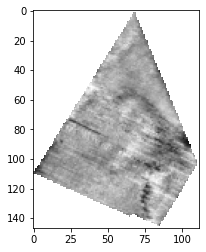

In [6]:
import matplotlib.pyplot as plt
with rasterio.open(new_tif_path) as dataset:
  print(dataset.count)
  data = dataset.read(1)
  for i in range(len(data)):
    for j in range(len(data[i])):
      if data[i][j] == 1.7976931348623157e+308:
        data[i][j] = np.NaN
  print(np.nanmax(data))
  print(np.nanmin(data))
  plt.imshow(data,cmap="gray")